In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data.csv', sep=';')
df

,Country Code,City,Location,Coordinates,Pollutant,Source Name,Unit,Value,Last Updated,Country Label
0,BE,NaN,Escautpont,"50.420270857658636, 3.551812869268811",SO2,EEA France,µg/m³,3.60000,2017-07-18T22:00:00+02:00,Belgium
1,BG,Teleorman-RNMCA,NET-RO058A,"43.650721999999995, 25.363583",CO,EEA Romania,µg/m³,1237.25114,2024-03-11T09:00:00+01:00,Bulgaria
2,BG,National air network,NET-BG001A,"42.518891999999994, 27.375144",O3,EEA Bulgaria,µg/m³,12.06000,2024-03-11T08:00:00+01:00,Bulgaria
3,BG,National air network,NET-BG001A,"42.669796999999996, 23.268403000000003",NO,EEA Bulgaria,µg/m³,42.43000,2024-03-11T08:00:00+01:00,Bulgaria
4,BG,National air network,NET-BG001A,"43.217279999999995, 27.935959999999998",NO2,EEA Bulgaria,µg/m³,16.60000,2024-03-11T08:00:00+01:00,Bulgaria
...,...,...,...,...,...,...,...,...,...,...
54546,CN,NaN,电机北厂,"37.7541, 115.6838",CO,ChinaAQIData,µg/m³,600.00000,2021-08-09T13:00:00+02:00,China
54547,CN,NaN,电视台,"41.1694, 80.29200000000002",PM10,ChinaAQIData,µg/m³,50.00000,2021-08-09T13:00:00+02:00,China
54548,CN,NaN,白沙活动中心,"29.897500000000004, 121.5594",CO,ChinaAQIData,µg/m³,400.00000,2021-08-09T13:00:00+02:00,China
54549,CN,NaN,百股街道,"41.1119, 121.1836",CO,ChinaAQIData,µg/m³,1100.00000,2021-08-09T13:00:00+02:00,China


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54551 entries, 0 to 54550
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country Code   54551 non-null  object 
 1   City           31021 non-null  object 
 2   Location       54549 non-null  object 
 3   Coordinates    54361 non-null  object 
 4   Pollutant      54551 non-null  object 
 5   Source Name    54551 non-null  object 
 6   Unit           54551 non-null  object 
 7   Value          54551 non-null  float64
 8   Last Updated   54551 non-null  object 
 9   Country Label  54436 non-null  object 
dtypes: float64(1), object(9)
memory usage: 4.2+ MB


In [4]:
df['Country Label'].unique()

array(['Belgium', 'Bulgaria', 'Brazil', 'Belize', 'Canada', 'Switzerland',
       'Chile', 'China', 'Spain', 'Finland', 'France', 'United Kingdom',
       'Ghana', 'Andorra', 'United Arab Emirates', 'Austria', 'Australia',
       'Bosnia and Herzegovina', 'Bangladesh', 'Colombia', 'Cyprus',
       'Gibraltar', 'Greece', 'Croatia', 'Hungary', 'Indonesia',
       'Ireland', 'Israel', 'India', 'Japan', 'Italy', 'Jordan',
       'Thailand', 'Turkey', 'Taiwan, China', 'United States',
       'Czech Republic', 'Germany', 'Denmark', 'Ecuador', 'Estonia',
       'Netherlands', 'Norway', 'New Zealand', 'Peru', 'Pakistan',
       'Poland', 'Portugal', 'Romania', 'Serbia', 'Sweden', 'Slovakia',
       nan, 'South Africa', "Lao People's Dem. Rep.", 'Lithuania',
       'Latvia', 'Montenegro', 'Macedonia, The former Yugoslav Rep. of',
       'Mongolia', 'Malta', 'Mexico', 'Malaysia', 'Mozambique',
       'Trinidad and Tobago', 'Iraq', 'Iceland', 'Ethiopia', 'Nepal',
       'Saudi Arabia', 'Slovenia'

In [5]:
Total_Countries = len(df['Country Label'].unique())
Total_Countries

117

In [6]:
df.isnull().sum()

Country Code         0
City             23530
Location             2
Coordinates        190
Pollutant            0
Source Name          0
Unit                 0
Value                0
Last Updated         0
Country Label      115
dtype: int64

<Axes: >

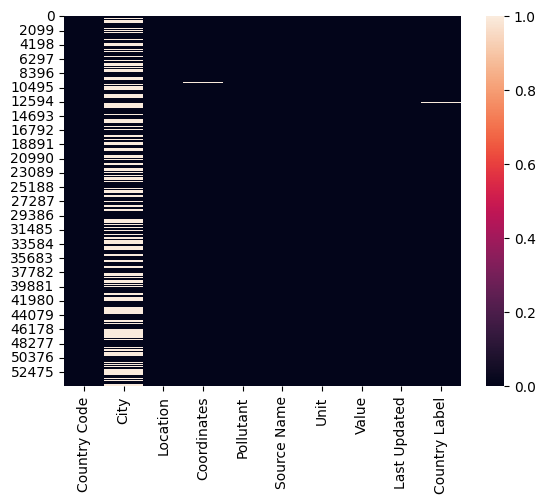

In [7]:
sns.heatmap(df.isnull())

In [8]:
#  filter required features from df
df2 = df[['Last Updated','Country Label','Value']]
df2

,Last Updated,Country Label,Value
0,2017-07-18T22:00:00+02:00,Belgium,3.60000
1,2024-03-11T09:00:00+01:00,Bulgaria,1237.25114
2,2024-03-11T08:00:00+01:00,Bulgaria,12.06000
3,2024-03-11T08:00:00+01:00,Bulgaria,42.43000
4,2024-03-11T08:00:00+01:00,Bulgaria,16.60000
...,...,...,...
54546,2021-08-09T13:00:00+02:00,China,600.00000
54547,2021-08-09T13:00:00+02:00,China,50.00000
54548,2021-08-09T13:00:00+02:00,China,400.00000
54549,2021-08-09T13:00:00+02:00,China,1100.00000


In [9]:
df2.isnull().sum()

Last Updated       0
Country Label    115
Value              0
dtype: int64

In [10]:
print(df2.shape)

(54551, 3)


In [11]:
df3 = df2.dropna(subset='Country Label')
df3.rename(columns={'Last Updated':'date_timestamp'},inplace=True)
df3

,date_timestamp,Country Label,Value
0,2017-07-18T22:00:00+02:00,Belgium,3.60000
1,2024-03-11T09:00:00+01:00,Bulgaria,1237.25114
2,2024-03-11T08:00:00+01:00,Bulgaria,12.06000
3,2024-03-11T08:00:00+01:00,Bulgaria,42.43000
4,2024-03-11T08:00:00+01:00,Bulgaria,16.60000
...,...,...,...
54546,2021-08-09T13:00:00+02:00,China,600.00000
54547,2021-08-09T13:00:00+02:00,China,50.00000
54548,2021-08-09T13:00:00+02:00,China,400.00000
54549,2021-08-09T13:00:00+02:00,China,1100.00000


In [12]:
df3['date_timestamp'] = df3['date_timestamp'].astype(str)
df3['date_timestamp'] = pd.to_datetime(df3['date_timestamp'],errors='coerce')
df3

,date_timestamp,Country Label,Value
0,2017-07-18 22:00:00+02:00,Belgium,3.60000
1,2024-03-11 09:00:00+01:00,Bulgaria,1237.25114
2,2024-03-11 08:00:00+01:00,Bulgaria,12.06000
3,2024-03-11 08:00:00+01:00,Bulgaria,42.43000
4,2024-03-11 08:00:00+01:00,Bulgaria,16.60000
...,...,...,...
54546,2021-08-09 13:00:00+02:00,China,600.00000
54547,2021-08-09 13:00:00+02:00,China,50.00000
54548,2021-08-09 13:00:00+02:00,China,400.00000
54549,2021-08-09 13:00:00+02:00,China,1100.00000


In [13]:
df3.isnull().sum()

date_timestamp    0
Country Label     0
Value             0
dtype: int64

In [14]:
df3['date'] = df3['date_timestamp'].apply(lambda x: x.strftime('%d-%m-%Y'))
# df3['year'] = df3['date_timestamp'].apply(lambda x: x.strftime('%Y'))
df3.drop(columns=['date_timestamp'],inplace=True)

df3

,Country Label,Value,date
0,Belgium,3.60000,18-07-2017
1,Bulgaria,1237.25114,11-03-2024
2,Bulgaria,12.06000,11-03-2024
3,Bulgaria,42.43000,11-03-2024
4,Bulgaria,16.60000,11-03-2024
...,...,...,...
54546,China,600.00000,09-08-2021
54547,China,50.00000,09-08-2021
54548,China,400.00000,09-08-2021
54549,China,1100.00000,09-08-2021


In [15]:
df3 = df3.sort_values(by='date', ascending=True)
df3

,Country Label,Value,date
47908,Spain,7.10000,01-01-2018
40014,Thailand,0.00600,01-01-2019
5257,Thailand,43.00000,01-01-2019
2592,Thailand,0.00900,01-01-2019
48200,Thailand,0.00200,01-01-2019
...,...,...,...
49596,Austria,9.87945,31-12-2023
42044,Germany,49.93000,31-12-2023
26978,Poland,6.30000,31-12-2023
14885,Germany,17.00000,31-12-2023


In [16]:
df3['Country Label'].value_counts()

Country Label
China                                11115
Japan                                 6270
United States                         6051
Spain                                 3251
France                                2490
                                     ...  
Philippines                              1
Chad                                     1
Madagascar                               1
Congo, Democratic Republic of the        1
Morocco                                  1
Name: count, Length: 116, dtype: int64

In [17]:
df4=df3.round(2)
df4['Value'] = df4['Value'].astype(float)
df4

,Country Label,Value,date
47908,Spain,7.10,01-01-2018
40014,Thailand,0.01,01-01-2019
5257,Thailand,43.00,01-01-2019
2592,Thailand,0.01,01-01-2019
48200,Thailand,0.00,01-01-2019
...,...,...,...
49596,Austria,9.88,31-12-2023
42044,Germany,49.93,31-12-2023
26978,Poland,6.30,31-12-2023
14885,Germany,17.00,31-12-2023


In [18]:
df5 = df4[df4['Value']>=0.0]
df5

,Country Label,Value,date
47908,Spain,7.10,01-01-2018
40014,Thailand,0.01,01-01-2019
5257,Thailand,43.00,01-01-2019
2592,Thailand,0.01,01-01-2019
48200,Thailand,0.00,01-01-2019
...,...,...,...
49596,Austria,9.88,31-12-2023
42044,Germany,49.93,31-12-2023
26978,Poland,6.30,31-12-2023
14885,Germany,17.00,31-12-2023


In [19]:
df5.describe()

,Value
count,5.385600e+04
mean,6.371933e+02
std,2.938007e+04
min,0.000000e+00
25%,2.400000e-01
50%,9.000000e+00
75%,3.100000e+01
max,3.198676e+06


In [21]:
df5.to_csv('pre_processed_data.csv', index=False)